In [10]:
import easyocr
from PIL import Image
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

In [52]:
FONT_PATH = r'C:/Windows/Fonts/arial.ttf'
name = 'mid_petri_2'
ext = 'png'

img_path = f'../../data/local/{name}.{ext}'
# img_path = f'../../data/morphed/{name}.{ext}'
# img_path = f'../../data/morphed/{name}_to_zero.{ext}'
# img_path = f'../../data/morphed/{name}_hand.{ext}'
# img_path = f'../../data/morphed/{name}_1.5_contrast.{ext}'

# img_path = f'../../data/superres/upscayl/{name}_upscayl_4x_digital-art-4x.{ext}' 

# img_path = f'../../data/upscaled/nn/{name}_2.{ext}'
# img_path = f'../../data/upscaled/nn/{name}_4.{ext}'
# img_path = f'../../data/upscaled/nn/cp_2_4.{ext}'

# img_path = f'../../data/superres/swinir/{name}.{ext}'

Image.open(img_path).show()

In [53]:

reader = easyocr.Reader(['en']) # this needs to run only once to load the model into memory
# result = reader.readtext('chinese.')
result = reader.detect(img_path, min_size=1, text_threshold=0.2, low_text=0.3, bbox_min_score=0.1, threshold=0.1, width_ths=0.5, height_ths=0.5, link_threshold=0.4, canvas_size=1280, mag_ratio=1.5)


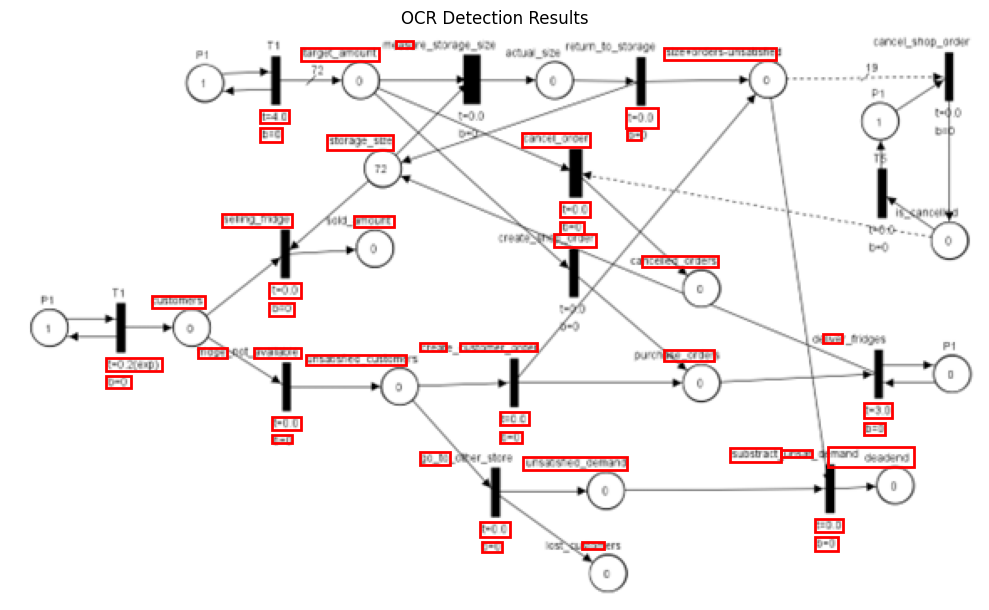

In [54]:
# Load the image
image = cv2.imread(img_path)
# Convert from BGR to RGB for matplotlib
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Display image
ax.imshow(image)

# Your result contains bounding box coordinates in the format [x_min, x_max, y_min, y_max]
bounding_boxes = result[0][0]  # Access the first element which contains the bounding boxes

# Draw bounding boxes
for box in bounding_boxes:
    # Extract coordinates
    x_min, x_max, y_min, y_max = box
    
    # Calculate width and height
    width = x_max - x_min
    height = y_max - y_min
    
    # Create rectangle patch
    rect = patches.Rectangle((x_min, y_min), width, height, 
                           linewidth=2, edgecolor='r', facecolor='none')
    
    # Add the patch to the Axes
    ax.add_patch(rect)

plt.title("OCR Detection Results")
plt.axis('off')
plt.tight_layout()
plt.show()

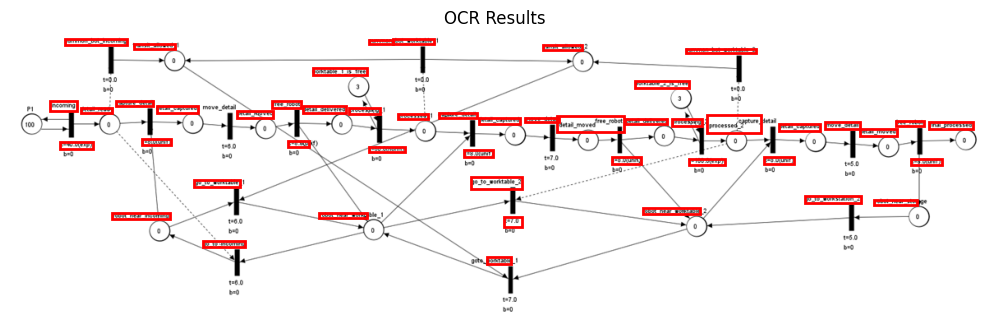

In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

# Load the image
image = cv2.imread(img_path)
# Convert from BGR to RGB for matplotlib
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Display image
ax.imshow(image)

# Draw bounding boxes and add text labels
for detection in result:
    # Get coordinates
    points = detection[0]
    text = detection[1]
    confidence = detection[2]
    
    # Convert points to rectangle format (x, y, width, height)
    x_min = min(point[0] for point in points)
    y_min = min(point[1] for point in points)
    width = max(point[0] for point in points) - x_min
    height = max(point[1] for point in points) - y_min
    
    # Create rectangle patch
    rect = patches.Rectangle((x_min, y_min), width, height, 
                             linewidth=2, edgecolor='r', facecolor='none')
    
    # Add the patch to the Axes
    ax.add_patch(rect)
    
    # # Add text label with confidence score
    # ax.text(x_min, y_min-5, f"{text} ({confidence:.2f})", 
    #         color='red', fontsize=12, fontweight='bold')

plt.title("OCR Results")
plt.axis('off')
plt.tight_layout()
plt.show()